# AE

Structure

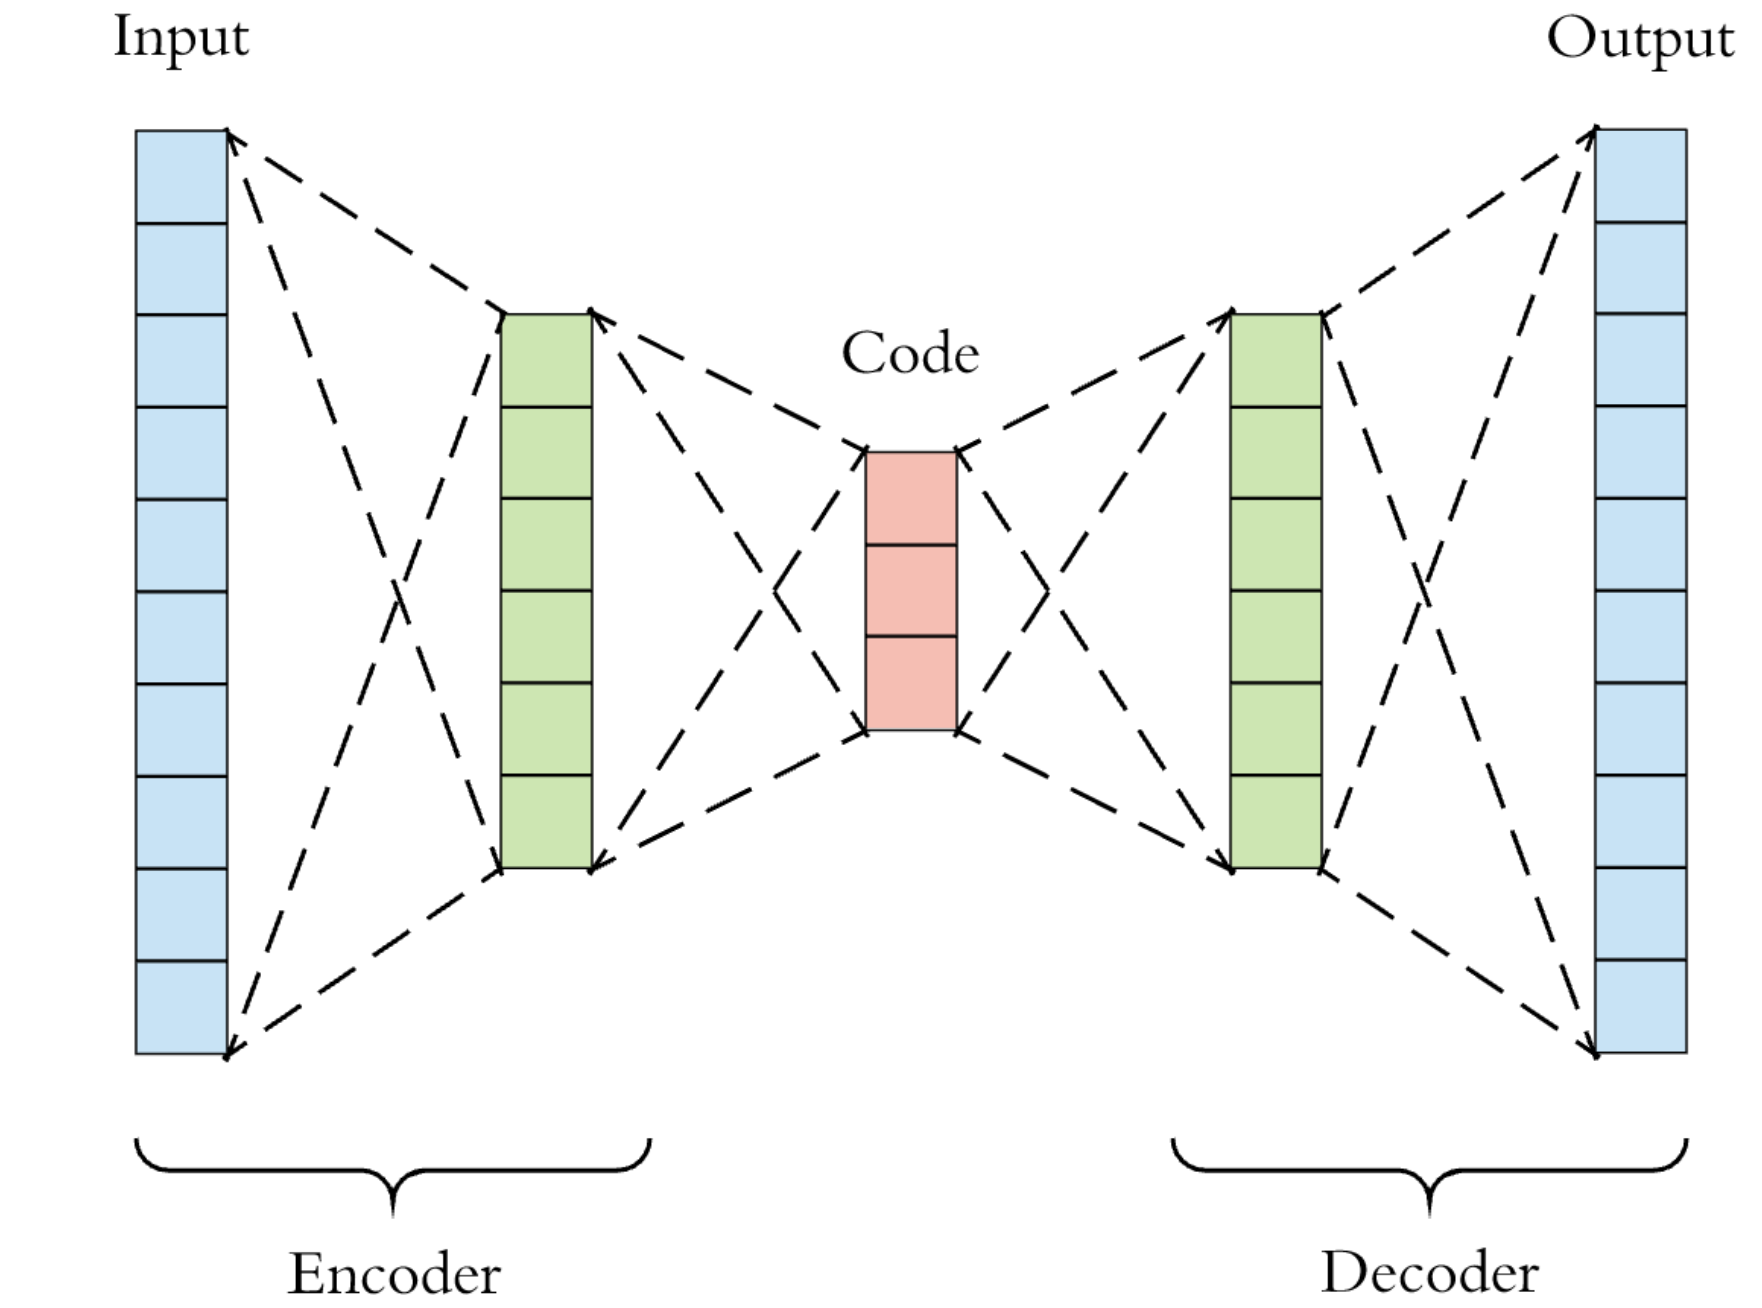

In [1]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
 
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()
# normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train,
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1047 - val_loss: 0.1030
Epoch 2/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1044 - val_loss: 0.1026
Epoch 3/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1041 - val_loss: 0.1023
Epoch 4/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1038 - val_loss: 0.1020
Epoch 5/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1035 - val_loss: 0.1017
Epoch 6/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1032 - val_loss: 0.1015
Epoch 7/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1029 - val_loss: 0.1012
Epoch 8/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1027 - val_loss: 0.1010
Epoch 9/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1024 - val_loss: 0.1008
Epoch

NameError: name 'encoder' is not defined

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

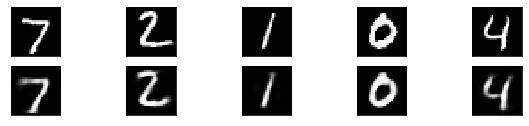

In [15]:
n = 5 # how many digits we will display
plt.figure(figsize=(10, 2))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

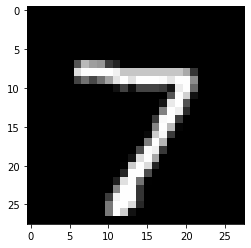

In [16]:
plt.imshow(x_test[0].reshape(28,28))